Train and fine-tune a Decision Tree for the moons dataset.
a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).
b. Split it into a training set and a test set using train_test_split().
c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.
d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from scipy.stats import randint

In [11]:
#Generate moons dataset with 10000 samples and noise = 0.4
X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

#X has 2 features, and 10000 rows and y is 1-dim


Shape of X: (10000, 2)
Shape of y: (10000,)


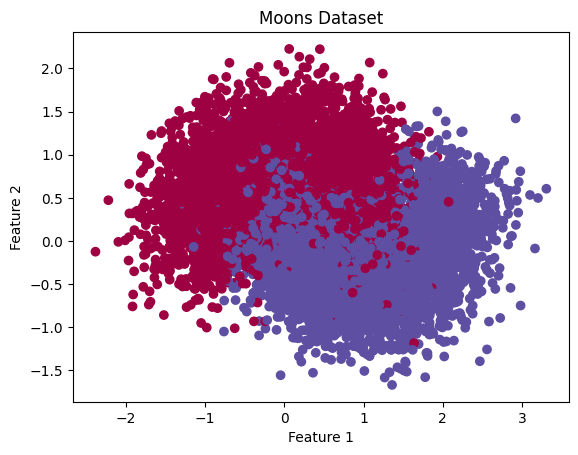

In [12]:
#Plotting the moons dataset

plt.scatter(X[:, 0],X[:, 1], c=y, cmap = plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()
plt.show()

In [13]:
#Splitting it into a training set and a test set using train_test_split().

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [14]:
# Use grid search with cross-validation (with the help of the GridSearchCV
# class) to find good hyperparameter values for a DecisionTreeClassifier.
# Hint: try various values for max_leaf_nodes.

# Define the parameter grid

# test_list : [10, 20, 30, 40, 50]
# test_list : [5, 10, 15, 20, 25, 30]
param_grid = {
    'max_leaf_nodes': [5, 10, 15, 20, 25, 30]
}

# Initialize the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_leaf_nodes': 25}


In [15]:
# Train the DecisionTreeClassifier with the best parameters
dt_clf = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf.fit(X_train, y_train)

# Evaluate on the test set
accuracy = dt_clf.score(X_test, y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.872


Try replacing GridSearchCV with RandomizedSearchCV.

In [16]:
#using Randomized search

# Define the parameter distribution, giving the same range
param_dist = {
    'max_leaf_nodes': randint(5, 30)
}

# Initialize the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt_clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_leaf_nodes': 23}


In [17]:
# Train the DecisionTreeClassifier with the best parameters
dt_clf = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf.fit(X_train, y_train)

# Evaluate on the test set
accuracy = dt_clf.score(X_test, y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.8735


 If a Decision Tree is underfitting the training set, is it a good idea to try scaling
the input features?

Decision Trees are invariant to feature scaling because they use thresholds to split data based on feature values, and the scaling of features does not change the relative ordering of the data points or the decision boundaries.